In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

### 生成数据
### 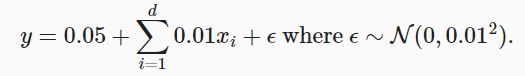

In [2]:
n_train, n_test, num_input, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_input, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

###  初始化模型参数

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_input, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [5]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：',torch.norm(w).item())
    # torch.norm 计算向量范数

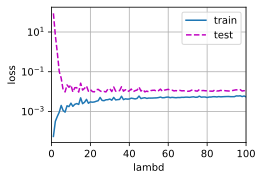

w的L2范数是： 12.655351638793945


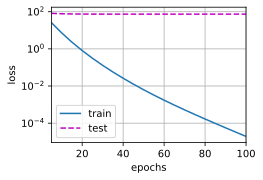

In [6]:
# 忽略正则化 ， 训练误差一直在减少， 测试误差不怎么变化， 说明出现了严重的过拟合
train(lambd=0)

w的L2范数是： 0.33151623606681824


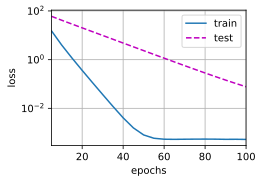

In [7]:
train(lambd=3)

w的L2范数是： 0.026034632697701454


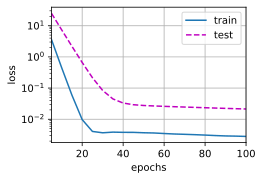

In [8]:
train(lambd=10)

w的L2范数是： 0.004153960384428501


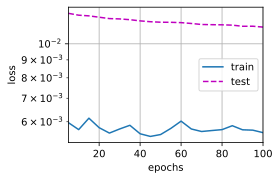

In [10]:
train(100)

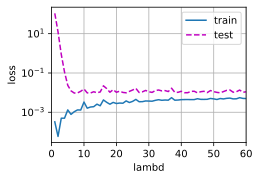

In [12]:
# 绘制 lambd 与 loss的关系图
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003

    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)

    print('w的L2范数是：',torch.norm(w).item())
    return d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)



animator = d2l.Animator(xlabel='lambd', ylabel='loss', yscale='log',
                            xlim=[0, 60], legend=['train', 'test'])
for lambd in range(60):
    train_loss, test_loss = train(lambd)
    animator.add(lambd + 1, (train_loss, test_loss))

In [ ]:
# 简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_input, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    
    # 只给 w 设置了衰减， bias 没有设置
    trainer = torch.optim.SGD([
        {"params":net[0].weight, 'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            # 执行单步优化
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
            
    print('w的L2范数：', net[0].weight.norm().item())

In [ ]:
train_concise(0)

In [ ]:
train_concise(3)

In [ ]:
# 采用L1 正则项
# def l1_penalty(w):
#     return torch.sum(torch.abs(w))

In [ ]:
# def train(lambd):
#     w, b = init_params()
#     net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
#     num_epochs, lr = 100, 0.003
#     animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
#                             xlim=[5, num_epochs], legend=['train', 'test'])
#     for epoch in range(num_epochs):
#         for X, y in train_iter:
#             # 增加了L2范数惩罚项
#             l = loss(net(X), y) + lambd * l1_penalty(w)
#             l.sum().backward()
#             d2l.sgd([w, b], lr, batch_size)
#         if (epoch + 1) % 5 == 0:
#             animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
#                                      d2l.evaluate_loss(net, test_iter, loss)))
#     print('w的L2范数是：',torch.norm(w).item())
#     # torch.norm 计算向量范数

In [ ]:
# train(1)

In [ ]:
# train(5)

In [ ]:
# torch.optim.SGD.step??